In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
X_train = np.load("/content/drive/MyDrive/Data/X_tr_concat.npy")
y_train = np.load("/content/drive/MyDrive/Data/y_tr_concat.npy")

X_val = np.load("/content/drive/MyDrive/Data/X_val_concat.npy")
y_val = np.load("/content/drive/MyDrive/Data/y_val_concat.npy")

In [4]:
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(1585000, 252) (1585000, 88) (503400, 252) (503400, 88)


In [6]:
features = 1025
batch_size = 512
numepochs = 50

In [10]:
def build_model():
  model = tf.keras.Sequential(
      [
       tf.keras.layers.Dense(256, activation="relu"),
       tf.keras.layers.Dropout(0.3),
       tf.keras.layers.Dense(256, activation="relu"),
       tf.keras.layers.Dropout(0.3),
       tf.keras.layers.Dense(128, activation="tanh"),
       tf.keras.layers.Dropout(0.3),
       tf.keras.layers.Dense(88, activation="sigmoid")
      ]
      )
  return model

In [11]:
model = build_model()

In [12]:
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss = "binary_crossentropy", metrics=['accuracy'])
stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, mode='auto')
history = model.fit(X_train,y_train,epochs=numepochs,batch_size=batch_size,verbose=1,validation_data=(X_val,y_val), callbacks=stop)

Epoch 1/50
3096/3096 [==============================] - 17s 4ms/step - loss: 0.1147 - accuracy: 0.2142 - val_loss: 0.0950 - val_accuracy: 0.2874
Epoch 2/50
3096/3096 [==============================] - 13s 4ms/step - loss: 0.0855 - accuracy: 0.2894 - val_loss: 0.0919 - val_accuracy: 0.2874
Epoch 3/50
3096/3096 [==============================] - 12s 4ms/step - loss: 0.0799 - accuracy: 0.2959 - val_loss: 0.0906 - val_accuracy: 0.2798
Epoch 4/50
3096/3096 [==============================] - 12s 4ms/step - loss: 0.0772 - accuracy: 0.2980 - val_loss: 0.0894 - val_accuracy: 0.2913
Epoch 5/50
3096/3096 [==============================] - 13s 4ms/step - loss: 0.0755 - accuracy: 0.2988 - val_loss: 0.0888 - val_accuracy: 0.2933
Epoch 6/50
3096/3096 [==============================] - 12s 4ms/step - loss: 0.0743 - accuracy: 0.2995 - val_loss: 0.0889 - val_accuracy: 0.2850
Epoch 7/50
3096/3096 [==============================] - 14s 4ms/step - loss: 0.0735 - accuracy: 0.2990 - val_loss: 0.0886 - val_ac

In [16]:
def plot_history(history):

    fig, axs = plt.subplots()

    """# create the accuracy subplot
    axs[0].plot(history.history["accuracy"], label = "train accuracy")
    axs[0].plot(history.history["val_accuracy"], label = "test accuracy")
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel("Epoch")
    axs[0].legend(loc ="lower right")
    axs[0].set_title("Accuracy eval")"""

    # create the error subplot
    axs.plot(history.history["loss"], label="train error")
    axs.plot(history.history["val_loss"], label="test error")
    axs.set_ylabel('Error')
    axs.set_xlabel("Epoch")
    axs.legend(loc="upper right")
    axs.set_title("Error eval")

    plt.show()

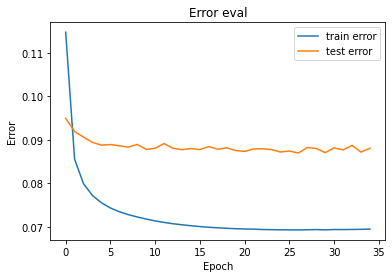

In [17]:
plot_history(history)

In [18]:
pred = model.predict(X_val)
print(pred.shape)

(503400, 88)


In [19]:
pred = pred>=0.5
pred = pred-0.0

In [20]:
true_positives = 0
false_positives = 0
false_negatives = 0

for j in range(pred.shape[0]):
  for k in range(pred.shape[1]):
    if y_val[j][k] == 1.0 and pred[j][k] == 1.0:
        true_positives+=1                                
    elif y_val[j][k] == 1.0 and pred[j][k] == 0.0:
        false_negatives+=1
    elif y_val[j][k] == 0.0 and pred[j][k] == 1.0:
        false_positives+=1
accuracy = (true_positives/(true_positives+false_positives+false_negatives))
precision = true_positives/(true_positives+false_positives)
recall = true_positives/(true_positives+false_negatives)
fscore = (2*precision*recall)/(precision+recall)


In [21]:
print(accuracy, precision, recall, fscore)

0.4751894833203505 0.7534335316693712 0.5626934522950728 0.6442419617184308


In [22]:
model.save("dnn_trained.h5")